<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">


# <center> 01. Basic tools in COMPUTER VISION! </center>


## <span style="color:red"> Outline </span> 
1. **Images and videos with opencv**
2. **Arithmetic Operations on Images**
3. **Geometrical transformations**

In [ ]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## <span style="color:green"> If you are in colaboratoy </span>: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

## <span style="color:red"> 1. Images and videos with opencv </span> 

#### Dealing with images ...

- Images are matrices of three channels, namely in format **R** (red),**G** (green), **B** (blue). 

- Namely each pixel represent a color value w.r.t intensities between [0-255] = $2^8$. In color, each matrix reprent the quantity of color at each channel

- Images data type is ``uint8`` but we should convert in ``float64`` to perfom operations

**Note:** In opencv RGB channels are coded as BGR

In [ ]:
I = cv.imread("../data/image_set/elephant/image_0008.jpg")
I2 = cv.cvtColor(I, cv.COLOR_BGR2RGB)
plt.imshow(I2);
plt.grid()
print("img size: ", I.shape)
print ("img type: ", I.dtype)
plt.scatter(50,100, marker="x", s=200, linewidth=5, c="b")
print ("pixel information: ", I[100,50])

Now, we go to split the channels of the images

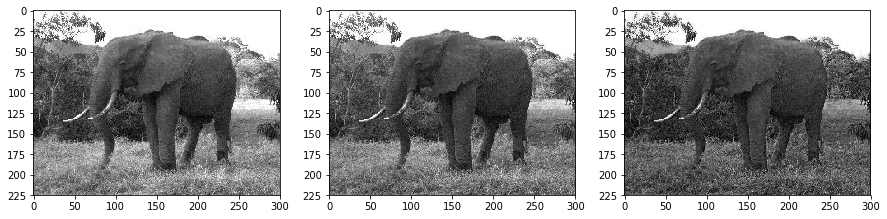

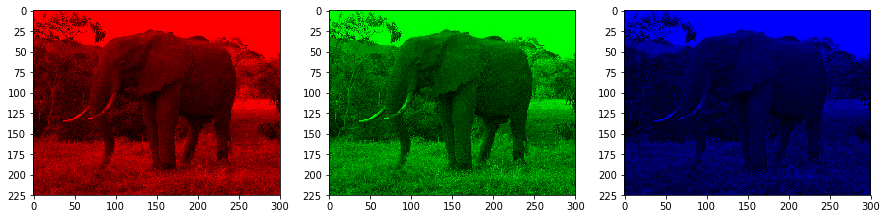

In [3]:
IR = np.zeros(shape=I.shape,dtype=np.uint8) 
IR[:,:,0] = I2[:,:,0]
IG = np.zeros(shape=I.shape,dtype=np.uint8)
IG[:,:,1] = I2[:,:,1];
IB = np.zeros(shape=I.shape,dtype=np.uint8)
IB[:,:,2] = I2[:,:,2];

# plot in gray intensity
plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(I2[:,:,0], cmap='gray') 
plt.subplot(132), plt.imshow(I2[:,:,1],cmap='gray')
plt.subplot(133), plt.imshow(I2[:,:,2],cmap='gray')
# plot w.r.t chanel colors
plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(IR) 
plt.subplot(132), plt.imshow(IG)
plt.subplot(133), plt.imshow(IB);

Images in much of the cases are worked in gray (a weigthed average of three channels). Work woth three channels are redundant!

(225, 300)

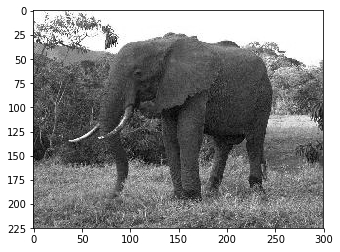

In [4]:
I_gray = cv.cvtColor(I, cv.COLOR_BGR2GRAY)
plt.imshow(I_gray, cmap='gray' );
I_gray.shape


We operate in **RGB** because simplicity on computation of independent colors, but visual system has other color spaces. For instance to stand out luminance. Such images could be transformed in these color codification or spaces. 

- YCrCb codification: 
    - Y:luminance
    - Cr: (r-Y) crominance of red
    - Cb: (b-Y) crominance of blue. How far is blue from Y channel

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/colorspaces.png" style="width:500px;">

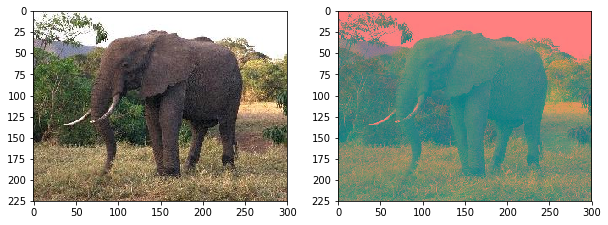

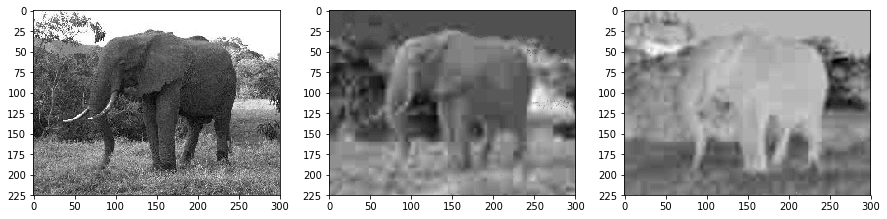

In [5]:
brightYCB = cv.cvtColor(I, cv.COLOR_BGR2YCrCb)

plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(I2)
plt.subplot(122), plt.imshow(brightYCB); 

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(brightYCB[:,:,0], cmap='gray') 
plt.subplot(132), plt.imshow(brightYCB[:,:,1],cmap='gray')
plt.subplot(133), plt.imshow(brightYCB[:,:,2],cmap='gray');

Also, we can process and save results

In [6]:
cv.imwrite("img_ycrcb.png",brightYCB)
cv.imwrite("img_ycrcb1.png",brightYCB[:,:,0])

True

In [7]:
!rm img_ycrcb.png
!rm img_ycrcb1.png

## <span style="color:orange"> Student Challenge </span>: 

- Thest with other color spaces, for instance Lab
- Which means HSV

#### Dealing with videos ...

We use the class `VideoCapture`, which have several methods and attributes about a specific video, such as: `CAP_PROP_FRAME_COUNT`, `CAP_PROP_POS_FRAMES`. [ 1 ](https://docs.opencv.org/3.0.0/d8/dfe/classcv_1_1VideoCapture.html)

In [8]:
V = cv.VideoCapture("../data/video_set_UT/23_4_5.avi")
print("numero de frames: ", V.get(cv.CAP_PROP_FRAME_COUNT))
print("pos del frame", V.get(cv.CAP_PROP_POS_FRAMES))
frames = [cv.cvtColor(V.read()[1], cv.COLOR_BGR2RGB) for _ in range(2,int(V.get(cv.CAP_PROP_FRAME_COUNT)))]
print ("tipo: ", type(frames), "longitud: ", len(frames))
print ("en una posición i del frames: ", type(frames[10]), frames[10].shape)

('numero de frames: ', 111.0)
('pos del frame', 0.0)
tipo:  <type 'list'> longitud:  109
en una posición i del frames:  <type 'numpy.ndarray'> (280, 480, 3)


#### Frame by frame interaction and dynamic updating 

In [9]:
def plot_from_list(index):
    img = None
    plt.axis('off')
    if img is None:
        img = plt.imshow(frames[index]);
    else:
        img.set_data(im);

interact(plot_from_list, index = widgets.IntSlider(min=0,max=(len(frames)-1),step=1,value=0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTEwOCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnTigKY=


<function __main__.plot_from_list>

#### To exactly ubicate a specific frame 

In [10]:
interact_manual(plot_from_list, index = widgets.IntSlider(min=0,max=(len(frames)-1),
                                                         step=1,value=0))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTEwOCksIEJ1dHRvbihkZXNjcmlwdGlvbj11J1J1biBJbnRlcmFjdCcsIHPigKY=


<function __main__.plot_from_list>

#### From a disk

In [11]:
# bash command
!mkdir frames 

V.set(cv.CAP_PROP_POS_FRAMES, 0); 
ret,f = V.read()
counter = 0
while ret:
    counter += 1
    fname = "frames/frame"+str(counter)+".png"
    cv.imwrite(fname, f)
    ret,f = V.read()

In [12]:
path = 'frames/'
files = [(f, f[5:-4]) for f in os.listdir(path) if f[-3:] == 'png']
files = sorted(files, key= lambda files: int(files[1]))

def plot_with_pil(index):
    img = None
    image_file = os.path.join(path, files[index][0]);
    im=plt.imread(image_file);
    plt.axis('off')
    if img is None:
        img = plt.imshow(im);
    else:
        img.set_data(im);

In [13]:
interact(plot_with_pil, index = widgets.IntSlider(min=0,max=(len(frames)-1),step=1,value=0))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2luZGV4JywgbWF4PTEwOCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGdldC1pbnTigKY=


<function __main__.plot_with_pil>

In [14]:
!rm -r frames

## <span style="color:red"> 2. Arithmetic Operations on Images </span> 

Images are matrices and therefore we can do pointwise operations (sum, multiplication) and obtain several statistical operations, such as the average of a video. 

- For instance, image blending (weighted fusion) is obtained as: $$Ib = I_1\alpha +(1-\alpha)I_2$$ with $\alpha = [0-1]$

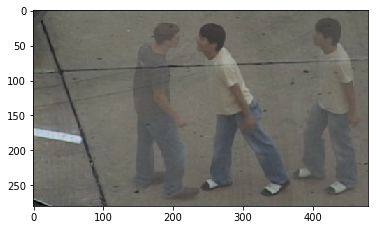

In [15]:
alpha= 0.4
Ib = frames[1]*alpha + (1-alpha)*frames[100]
Ib  = Ib.astype(np.uint8)
plt.imshow(Ib);

In fact, gray images is a **Is a weigthed mean among chanels!**
$Y = 0.2125 R + 0.7154 G + 0.0721 B$

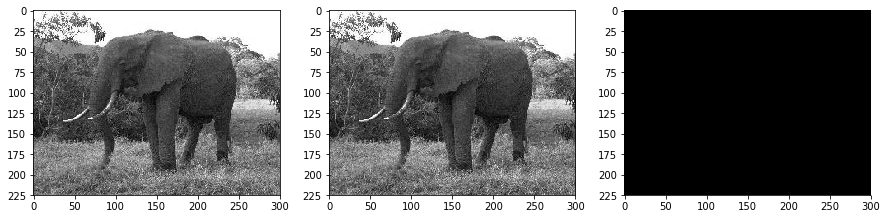

In [16]:
gray_hand = I2[:,:,0]*0.2125 + I2[:,:,1]*0.7154 + I2[:,:,2]*0.0721
gray_hand = gray_hand.astype(np.uint8)
gray_cv = cv.cvtColor(I2, cv.COLOR_RGB2GRAY)
gray_hand = gray_cv.astype(np.uint8)
dif = cv.subtract(gray_hand, gray_cv)

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(gray_hand, cmap='gray') 
plt.subplot(132), plt.imshow(gray_cv,cmap='gray')
plt.subplot(133), plt.imshow(dif,cmap='gray');

We can also sum or rest information. **Which is obtained as difference of consecutive frames ?**

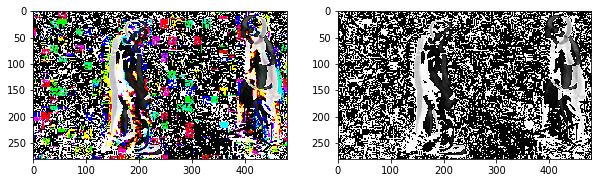

In [17]:
Ib = frames[10]- frames[20]
Ib  = Ib.astype(np.uint8)

Ibg = cv.cvtColor(frames[10], cv.COLOR_RGB2GRAY) - cv.cvtColor(frames[20], cv.COLOR_RGB2GRAY)

plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(Ib)
plt.subplot(122), plt.imshow(Ibg, cmap='gray' ); 

## <span style="color:orange"> Student Challenge </span>: 

- Compute the average of the video, which did you obtain?
    
    -try with list: `frames`
    
    -try with a new video: `frames_l1= ../data/long_videos/street.avi`
      

## <span style="color:red"> 3. Geometrical transformations on Images </span> 

Matricial operation are fundamental to obtain rigid geometrical transformation on images. Now, we study **rigid transformation**, from which global changes are applied but local information remain the same. To do rigid transformation, we should define a transformation matrix $\mathbf{M}$ that operate at pixel level, as: 

$$\begin{bmatrix}
{x}'_i\\ 
{y}'_i
\end{bmatrix} = \boldsymbol{M} \begin{bmatrix}
x_i\\ 
y_i\\ 
1
\end{bmatrix}
$$

##### Translation

In such case the transformation matrix is defined as: 

$$\boldsymbol{M} = \begin{bmatrix}
1 & 0 & t_x \\ 
0 & 1 & t_y
\end{bmatrix}$$


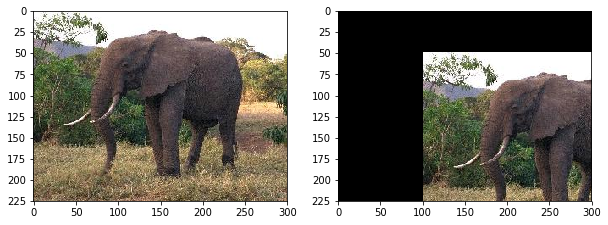

In [21]:
height, width = I2.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
trans = cv.warpAffine(I2,M,(width, height))

plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(I2) 
plt.subplot(122), plt.imshow(trans);

##### Rotation

In such case, the image is rotated an angle $\theta$, and the fundamental matrix looks like: 

$$\boldsymbol{M} =\begin{bmatrix}
\cos(\theta) & -\sin(\theta)\\ 
\sin(\theta) & \cos(\theta)
\end{bmatrix}$$

But complete version of `OpenCV` allows to obtain a center and scaled image rotarion, such as: 

$$\boldsymbol{M} =\begin{bmatrix}
\alpha & \beta  & (1-\alpha)\text{center.x}- \beta\text{center.y}\\ 
-\beta & \alpha & \beta\text{center.x} + (1-\alpha)\text{center.y}
\end{bmatrix}$$

where: 
$$\alpha = scale\cos(\theta)$$
$$\beta = scale\sin(\theta)$$

[[ -1.73648178e-01   9.84807753e-01   6.57487583e+01]
 [ -9.84807753e-01  -1.73648178e-01   2.79169759e+02]]


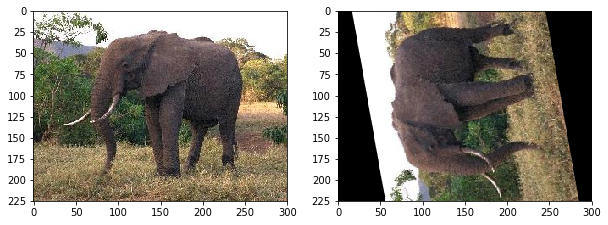

In [23]:
height, width = I2.shape[:2]
center = (width / 2, height / 2)
M = cv.getRotationMatrix2D(center , 100, 1.0)
print (M)
rotated = cv.warpAffine(I2, M, (width, height))
plt.figure(figsize=(10,12))
plt.subplot(121), plt.imshow(I2) 
plt.subplot(122), plt.imshow(rotated);

##### Scaling

Resizing of the image and reconstruct by an interpolation process, using: `dsize=Size(round(fx*cols), round(fy*rows))`
- `cv2.INTER_CUBIC`
- `cv2.INTER_LINEAR` for zooming

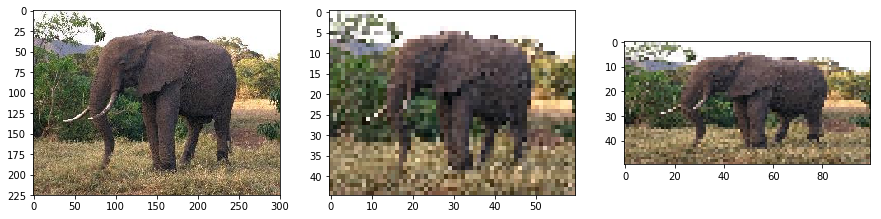

In [20]:
height, width = I2.shape[:2]
res = cv.resize(I2,(int(0.2*width), int(0.2*height)), interpolation = cv.INTER_CUBIC)
res2 = cv.resize(I2, (100, 50)) 

plt.figure(figsize=(15,20))
plt.subplot(131), plt.imshow(I2) 
plt.subplot(132), plt.imshow(res)
plt.subplot(133), plt.imshow(res2); 

## <span style="color:orange"> Student Challenge </span>: 

- Read a video and to each frame apply a rotation transformation summing up 1 degree at each frame. Save frames and reconstruct the video. Use  `frames`

- Read a video and substract the average image. Which is the effect obtained? Use `frames_l1`

# References

[1]. [Opencv Doc](https://docs.opencv.org/3.0.0/d8/dfe/classcv_1_1VideoCapture.html)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">